In [225]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Haford STD: 34.422, Livingston STD: 27.138


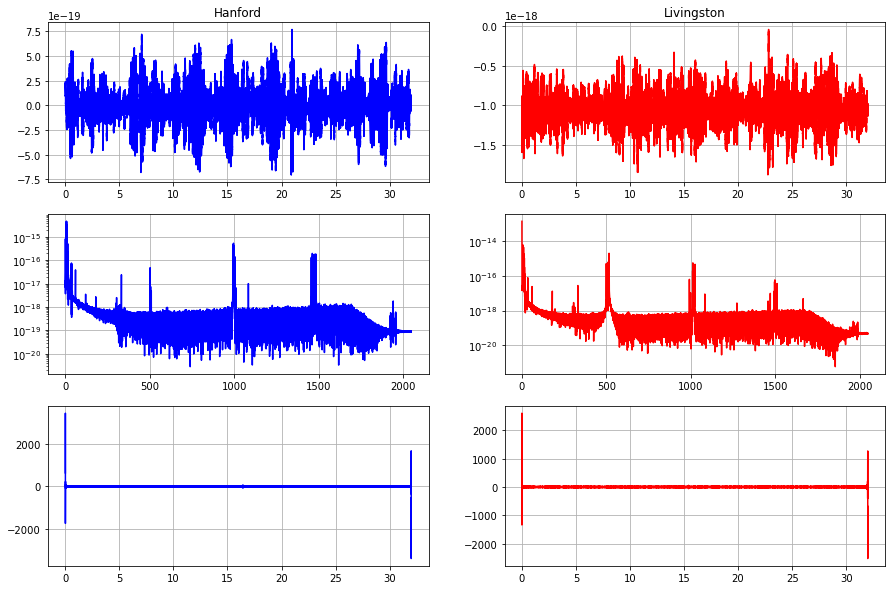

In [226]:
#!/usr/plocal/bin/python3

# Hw04a
#
# This program reads data from the given LIGO files and then interperets the data to conclude whether
# there are Gravitational Waves.
#
# @author Scott Merkley
# @version March 25, 2022

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')


# The Frequency we are looking for (ps. already known)
desiredFreq = 4096

# Import LIGO Data
dataH = np.loadtxt('GW150914_H.dat')
dataL = np.loadtxt('GW150914_L.dat')

hanfordX = np.arange(0, 32, dt)
livingstonX = np.arange(0, 32, dt)

# Run FFT on the data
hanfordFFT    = np.fft.rfft(dataH)
livingstonFFT = np.fft.rfft(dataL)

# Get the Frequency information
dt             = 1 / desiredFreq # 1 over the frequency we are looking for, which was given to us
hanfordFreq    = np.fft.rfftfreq(len(dataH), dt)
livingstonFreq = np.fft.rfftfreq(len(dataL), dt)

# Get the Power Spectral Density (PSD) of the raw data
hanfordPSD    = signal.welch(dataH, fs = desiredFreq)
livingstonPSD = signal.welch(dataL, fs = desiredFreq)

# plt.yscale('log')
# plt.plot(hanfordPSD[0], hanfordPSD[1])
# plt.show()

# Need to create a function using interp1d to create a function of the PSD so that we can get an array as long as the FFT output
# 1 / np.sqrt(PSD[1]) is filtering the data
hanfordInterpPSD    = interpolate.interp1d(hanfordPSD[0], hanfordPSD[1])
livingstonInterpPSD = interpolate.interp1d(livingstonPSD[0], livingstonPSD[1])

# Filtering Data
# You can make a linspace because you are still working in Frequency space instead of time space
# Going from [20, 300] in the frequency space becuase that is the range LIGO is sensitive at

w = np.zeros(len(hanfordFreq))
for i in range(0, len(hanfordFreq)):
    if(hanfordFreq[i] > 25 and hanfordFreq[i] < 300):
        w[i] = 1

filteredHanford    = hanfordFFT * 1 / np.sqrt(hanfordInterpPSD(hanfordFreq)) * w # multiply by tophat function between [25, 300]

w1 = np.zeros(len(livingstonFreq))
for i in range(0, len(livingstonFreq)):
    if(livingstonFreq[i] > 25 and livingstonFreq[i] < 300):
        w1[i] = 1

filteredLivingston    = livingstonFFT * 1 / np.sqrt(livingstonInterpPSD(livingstonFreq)) * w1 # multiply by tophat function between [25, 300]

# Inverse FFT to get back to time domain
inverseHanfordFFT    = np.fft.irfft(filteredHanford)
inverseLivingstonFFT = np.fft.irfft(filteredLivingston)

# Estimate the background noise using the standard deviation
hanfordSTD    = np.std(inverseHanfordFFT)
livingstonSTD = np.std(inverseLivingstonFFT)

# Printing Information back to the User
print(f'Haford STD: {hanfordSTD:0.5}, Livingston STD: {livingstonSTD:0.5}')
# print(hanfordFFT.var(axis = 0))
# Not sure how to do the error analysis for this problem...

# Plotting the Gravitational Wave Data
# plt.figure(figsize = (15, 10))
# plt.title('LIGO Gravitational Wave Data', size = 18)
# plt.plot(hanfordX, inverseHanfordFFT, 'b-', label = 'Hanford')
# plt.plot(dataL, inverseLivingstonFFT, 'r-', label = 'Livingston')
# plt.xlabel('Time Domain', size = 16)
# plt.xticks(size = 14)
# plt.ylabel('Space Domain', size = 16)
# plt.yticks(size = 14)
# plt.grid()
# plt.legend(prop = {'size' : 15})
# plt.savefig('hw04a.pdf')
# plt.show()


# Making a Subplot
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
ax[0, 0].plot(hanfordX, dataH, 'b-')
ax[0, 0].grid()
ax[0, 0].title.set_text('Hanford')
ax[1, 0].set_yscale('log')
ax[1, 0].plot(hanfordFreq, np.absolute(hanfordFFT), 'b-')
ax[1, 0].grid()
ax[2, 0].plot(hanfordX, inverseHanfordFFT, 'b-')
ax[2, 0].grid()
# ax[2, 0].set_xlim(16.4, 16.45)

ax[0, 1].plot(livingstonX, dataL, 'r-')
ax[0, 1].title.set_text('Livingston')
ax[0, 1].grid()
ax[1, 1].set_yscale('log')
ax[1, 1].plot(livingstonFreq, np.absolute(livingstonFFT), 'r-')
ax[1, 1].grid()
ax[2, 1].plot(livingstonX, inverseLivingstonFFT, 'r-')
ax[2, 1].grid()
# ax[2, 1].set_xlim(15.4, 15.45)

plt.savefig('hw04a.pdf')